In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

Data preprocessing

In [84]:
data = pd.read_csv("E:\Diabetes predictions\diabetes.csv")
df = pd.DataFrame(data)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\yash kevadiya\AppData\Local\Temp\ipykernel_19584\2186964082.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("E:\Diabetes predictions\diabetes.csv")


In [85]:
print(df.head())
print(df.describe())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.0

In [86]:
print(df.isnull().sum())
print(df.duplicated().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
0


In [87]:
target = df['Outcome']
variables = df.drop(columns = 'Outcome', axis = 1)

In [88]:
# sort out data on basis of diabetes

variables[target == 1].describe()
mean_diabetes = variables[target == 1].mean()


In [89]:
variables[target == 0].describe()
mean_no_diabetes = variables[target == 0].mean()


In [90]:
df_summary = pd.DataFrame({'variables':variables.columns,'mean_diabetes':mean_diabetes,'mean_no_diabetes':mean_no_diabetes})

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns 

C:\Users\yash kevadiya\AppData\Local\Temp\ipykernel_19584\582116380.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


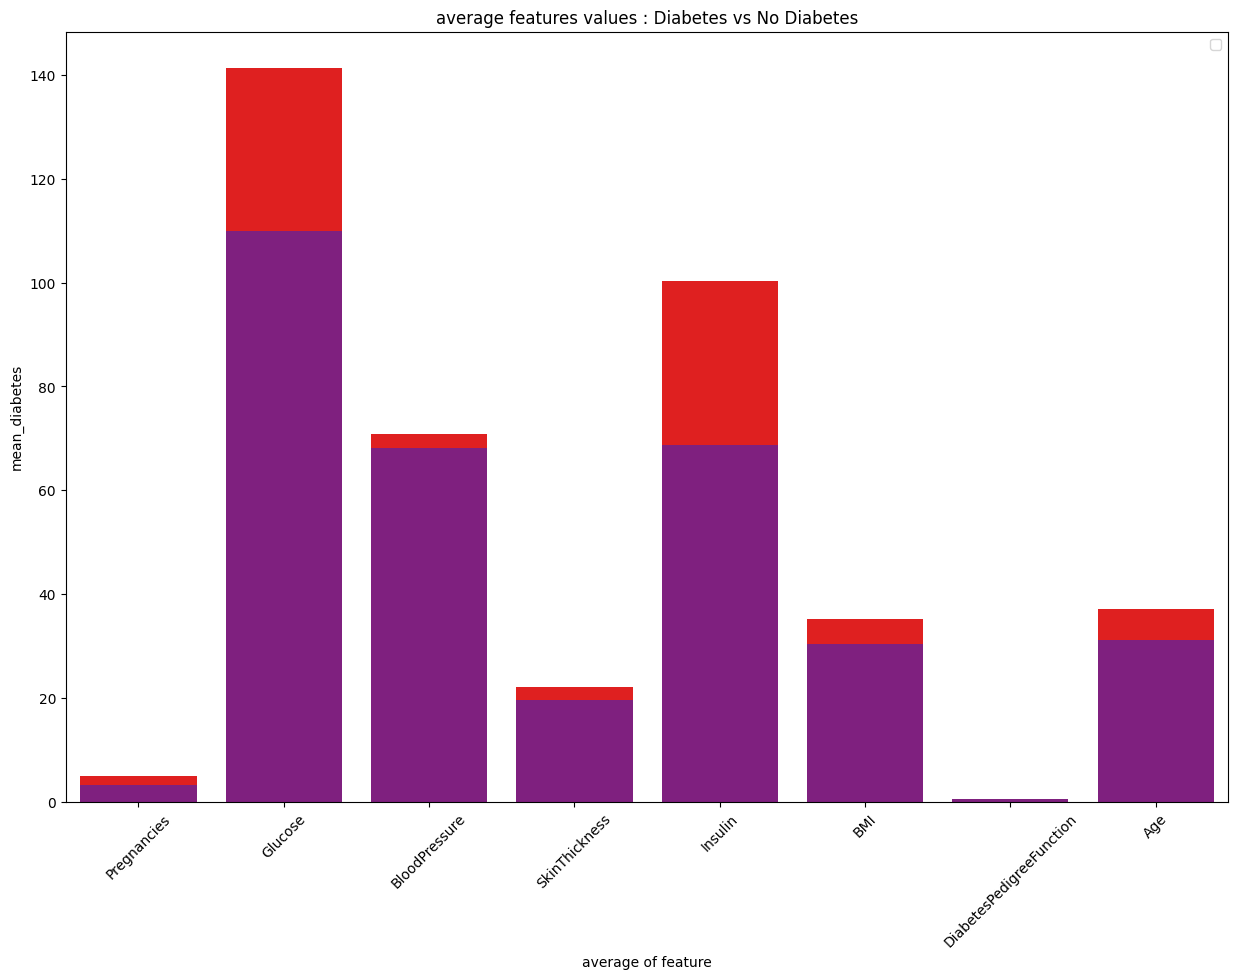

In [92]:
plt.figure(figsize = (15,10))
sns .barplot(x = 'variables', y = 'mean_diabetes',color = 'red' ,data = df_summary)
sns.barplot(x = 'variables', y = 'mean_no_diabetes',color = 'blue', alpha = 0.5 ,data = df_summary)
plt.title("average features values : Diabetes vs No Diabetes")
plt.xlabel("average of feature")
plt.legend()
plt.xticks(rotation = 45)
plt.show()

In [93]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [94]:
x  = variables
y = target
print(x)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [98]:
scaler = StandardScaler()


In [99]:
scaler.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [100]:
standardized_data = scaler.transform(x)

In [102]:
print(standardized_data)
x = standardized_data
y  =target

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
